## Debugging Task Knowledge Graph

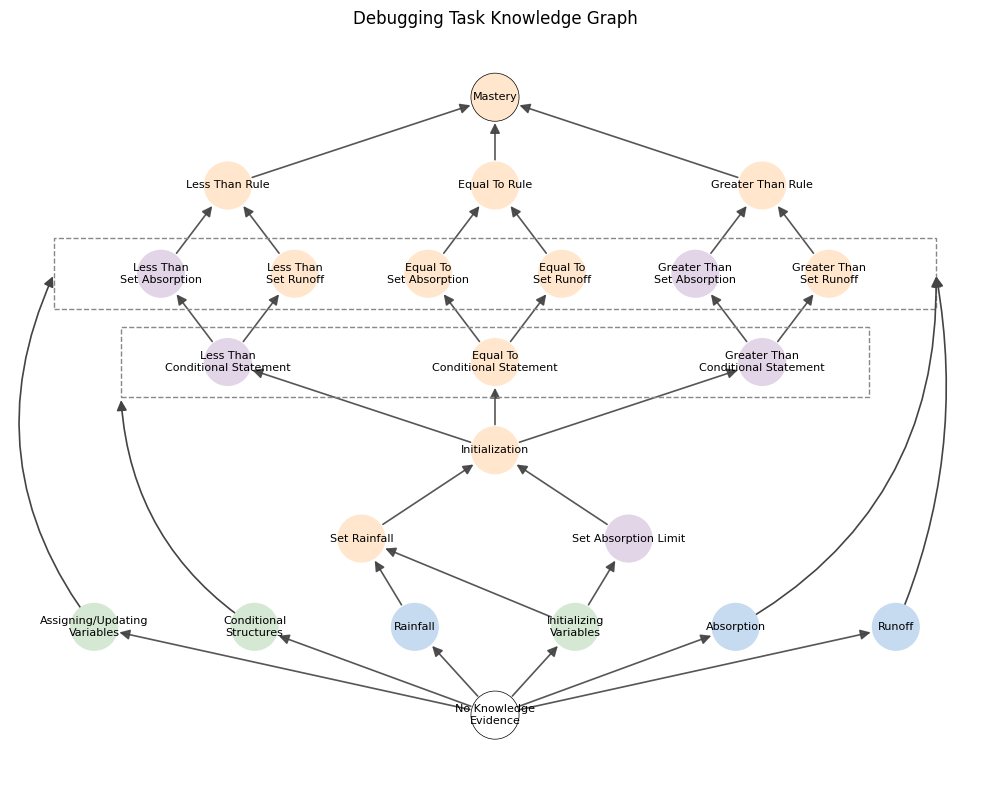

In [1]:
import math, networkx as nx, matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

mastery="Mastery"
rules=["Less Than Rule","Equal To Rule","Greater Than Rule"]

set_nodes=[];cond_nodes=[];edges=[]
for r in rules:
    base=r.replace(" Rule","")
    sa=f"{base}\nSet Absorption"; sr=f"{base}\nSet Runoff"
    set_nodes.extend([sa,sr]); edges.extend([(sa,r),(sr,r)])
    cond=f"{base}\nConditional Statement"
    cond_nodes.append(cond); edges.extend([(cond,sa),(cond,sr)])

init_node="Initialization"; io_nodes=["Set Rainfall","Set Absorption Limit"]
edges.extend([(init_node,c) for c in cond_nodes]+[(n,init_node) for n in io_nodes]+[(r,mastery) for r in rules])

concept_nodes=["Assigning/Updating\nVariables","Conditional\nStructures","Rainfall","Initializing\nVariables","Absorption","Runoff"]
null_node="No Knowledge\nEvidence"
edges.extend([(null_node,n) for n in concept_nodes])

edges += [
    ("Initializing\nVariables", "Set Rainfall"),
    ("Initializing\nVariables", "Set Absorption Limit"),
]

edges.append(("Initializing\nVariables", "Set Rainfall"))
edges.append(("Rainfall", "Set Rainfall"))

G=nx.DiGraph(); G.add_nodes_from([mastery,null_node]+rules+set_nodes+cond_nodes+[init_node]+io_nodes+concept_nodes); G.add_edges_from(edges)

pos={
    mastery:(0,4),
    "Less Than Rule":(-2,3),"Equal To Rule":(0,3),"Greater Than Rule":(2,3),
    "Less Than\nSet Absorption":(-2.5,2),"Less Than\nSet Runoff":(-1.5,2),
    "Equal To\nSet Absorption":(-0.5,2),"Equal To\nSet Runoff":(0.5,2),
    "Greater Than\nSet Absorption":(1.5,2),"Greater Than\nSet Runoff":(2.5,2),
    "Less Than\nConditional Statement":(-2,1),"Equal To\nConditional Statement":(0,1),"Greater Than\nConditional Statement":(2,1),
    init_node:(0,0),
    "Set Rainfall":(-1,-1),"Set Absorption Limit":(1,-1),
    "Assigning/Updating\nVariables":(-3,-2),"Conditional\nStructures":(-1.5,-2),"Initializing\nVariables":(1.5,-2),
    "Rainfall":(0,-2),"Absorption":(2.5,-2),"Runoff":(3.5,-2),
    null_node:(0,-3)
}

concept_order = [
    "Assigning/Updating\nVariables",
    "Conditional\nStructures",
    "Rainfall",
    "Initializing\nVariables",
    "Absorption",
    "Runoff",
]
span_min, span_max = -3, 3
step = (span_max - span_min) / (len(concept_order) - 1)
for i, n in enumerate(concept_order):
    pos[n] = (span_min + i * step, -2)

special={"Set Absorption Limit","Less Than\nConditional Statement","Less Than\nSet Absorption",
         "Greater Than\nConditional Statement","Greater Than\nSet Absorption"}

fill=[ "#E1D5E7" if n in special else
       "#D5E8D4" if n in concept_nodes[:2] else
       "#C6DBEF" if n in concept_nodes[2] else
       "#D5E8D4" if n in concept_nodes[3] else
       "#C6DBEF" if n in concept_nodes[4:] else
       ("#FFFFFF" if n==null_node else "#FFE6CC") for n in G.nodes()]
border=["black" if n in {mastery,null_node} else "#00000000" for n in G.nodes()]
node_size=1200; margin_pt=math.sqrt(node_size/math.pi)-1

plt.figure(figsize=(10,8))
nx.draw_networkx_nodes(G,pos,node_size=node_size,node_color=fill,edgecolors=border,linewidths=0.5)
nx.draw_networkx_labels(G,pos,font_size=8)
nx.draw_networkx_edges(G,pos,arrows=True,arrowsize=15,edge_color="#444444",alpha=0.9,
                       width=1.2,min_source_margin=margin_pt,min_target_margin=margin_pt)
ax=plt.gca()

for y in (2,1):
    xs=[x for n,(x,yy) in pos.items() if yy==y]
    rect=Rectangle((min(xs)-0.8,y-0.4),max(xs)-min(xs)+1.6,0.8,
                   linewidth=1,edgecolor="#888888",linestyle="--",facecolor="none")
    ax.add_patch(rect)

src1=pos["Assigning/Updating\nVariables"]; dest1=(-3.3,2)
arrow1=FancyArrowPatch(src1,dest1,arrowstyle="-|>",color="#444444",lw=1.2,mutation_scale=15,
                       connectionstyle="arc3,rad=-0.3")
ax.add_patch(arrow1)

src2=pos["Conditional\nStructures"]; dest2=(-2.8,0.6)
arrow2=FancyArrowPatch(src2,dest2,arrowstyle="-|>",color="#444444",lw=1.2,mutation_scale=15,
                       connectionstyle="arc3,rad=-0.25")
ax.add_patch(arrow2)

src3 = pos["Absorption"]
dest3 = (3.3, 2)
arrow3 = FancyArrowPatch(
    src3, dest3,
    arrowstyle="-|>",
    color="#444444",
    lw=1.2,
    mutation_scale=15,
    connectionstyle="arc3,rad=0.3",
)
ax.add_patch(arrow3)

src4 = pos["Runoff"]
dest4 = (3.3, 2)
arrow4 = FancyArrowPatch(
    src4, dest4,
    arrowstyle="-|>",
    color="#444444",
    lw=1.2,
    mutation_scale=15,
    connectionstyle="arc3,rad=0.15",
)
ax.add_patch(arrow4)

plt.title("Debugging Task Knowledge Graph")
plt.axis("off");
plt.tight_layout();
plt.show()